In [8]:
from tqdm import tnrange, tqdm_notebook as tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

# load data

In [10]:
data_dir = 'data/03'  # directory with all .csv files
num_runs = 30

feature_dfs = []
for run_idx in tnrange(1, num_runs+1):
    path = os.path.join(data_dir, 'run_{}_features.csv'.format(run_idx))
    with open(path) as f:
        feature_dfs.append(pd.read_csv(f))

In [11]:
def concat_feature_dfs(dfs):
    concated_df = pd.concat(dfs, axis=1)
    return concated_df.groupby(concated_df.columns, axis=1).mean()

In [12]:
feature_dfs[0].head()

,timestep,avg. node degree,avg. local clustering coefficient,avg. weight,# created links,# reinforced links
0,0,0.0036,0.0,1.0,9,0
1,1,0.0088,0.0,1.0,13,0
2,2,0.0136,0.0,1.0,12,0
3,3,0.0160,0.0,1.0,6,0
4,4,0.0212,0.0,1.0,13,0


# deviation of the average feature values over different number of runs

In [13]:
deviation = dict()
for i in tnrange(2, len(feature_dfs)+1):
    dev = (concat_feature_dfs(feature_dfs[:i]) - concat_feature_dfs(feature_dfs[:i-1])).abs()
    dev.drop('timestep', axis=1, inplace=True)
    deviation[i] = dev.mean()

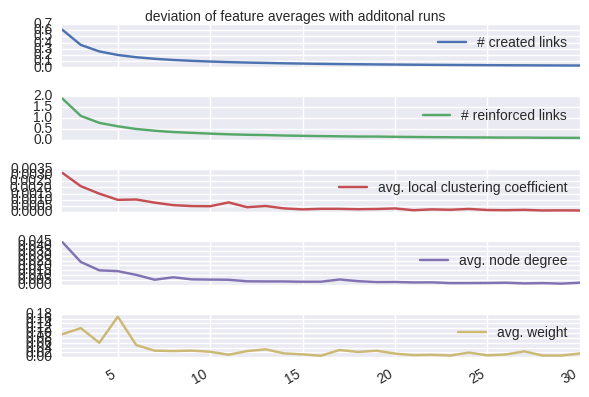

In [14]:
deviation_df = pd.DataFrame.from_dict(deviation, orient='index')
axs = deviation_df.plot(subplots=True, title='deviation of feature averages with additonal runs')
plt.tight_layout() 